### Imports

***FASTAI V1***

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
  
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

!pip install fastai

import fastai
from fastai import *
from fastai.vision import *

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10418/123020/sample_submission.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1546326541&Signature=WfpXoHo9ZEdhCOlmzM9xAWqSXf4as%2BpzI6qIMMop8xRBfLV2eBan5p%2B92oQwvzYP%2F%2FqjE%2FOvU7w1SHFM6sinAD8rz5ElYkVyc8yN15f00ajjFWlTKDqFAtn4eyYZM8e9dKBrl3M2YBZlBwBc77cLX5rO%2B5NVPCzpXcne%2BT1PnztiYds5rGo0T46HNPvV3XYl6sM3nXlnupkw%2Fi%2BeucwAWnC%2B1LpvpWVvAXOY9DJchal6r4Z1QD5EEfkbUbFT0MIoaN2g5%2B3lqDYbet0zQtk0BK5II%2BHNodacslHpf77RQvPmpHEXg52uOi2K3XelgDtT39DmZBn4RByrJoy%2FnXrdIA%3D%3D" -O "sample_submission.csv" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10418/123020/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1546326563&Signature=X15seZbJM9G1UsHs8FjI0IjgPjUuxaMOTX6FFPU672HTxxjxFaF98YDRxe0h4x6xRIIohG3VxGyz3TIIKMh2Q68xyXgedXK0qpmYajmZENR6opMH61GD5UtGcn%2FiaQq841xAgIhhANNbbeMHnMJGmV5TzNk%2BUgBbU%2B85kt5UQxD%2Bywv05ZdKLBBkhAiZFUWUD48rEaLgMWJW32Hvr7jTHD65a5%2FRABSIFbTKNAUjXwLwgqwBMFhOHCJWC%2FZkwIeYBS2Q4MpftGQ5IlvA%2BSQS9iuk9GWq7il67sVb8MPzRAihV%2BbZ7RLl814VLxMDDlmrqMdqsteVrjdOGsF0t17GEw%3D%3D" -O "train.csv" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10418/123020/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1546326580&Signature=Xp4Ov64X%2BxooAFT8Lj2P9OdiAVneDHABZMUcJD5HXvy%2FR5%2F%2B9iGVCS08DDi04P%2F8wqScwDVreRpEE6xNvZzXcdxQ0AZ0xcpP6A8IAzKTEOLed%2BqCxf7YZXJJW75vMfRgqDvN7MjsrcGYXFGtBUaj6CtVcqdJ59AYbjKFaoJzjtW4rMHRRTwozTBdVoUq7Ru36fMcjb9MjMZZhkKdyNr9TaMo2Tiw1MEBxz4R3Wax%2B%2BxEZWFksXfdNCljX4c4RbV1y7yeIiUBIuZu1X8rsmZcVCyDxRrrgaxf%2BtCrPLLcSMFkHtaoLJeIrHj249cHqT5CeRx7fZAtnVlQZIE6bScuww%3D%3D" -O "test.zip" -c

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10418/123020/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1546326595&Signature=AROAHUrXLjjgx2gyElYptPVyBh3sn8jPA%2FHcF2xureqQvF9AoWKT8QzM4Uqz2WvswqExQ1nJrYb747i2%2BT6DDQuvgMarjpfopKt%2FcUvHEbLpHbGRwPjiPW5M11h5ElC9wy%2BCC2YA25O2FOVN47iwq%2BgRHymkGla2T1kfUNBtQEcj57pjwQXzAYQ%2F91I6DpakdPVqPNW6FBUqTNWUyS%2Fug%2FXUOlA6h9fgMmNPR7QgS7RLcYXUCwGAZqqHSNbNfJyZqBQOiqagRcUhduIsta%2BQBEo4JLo8%2B4EF%2Bqlaxg87MLSFmM58HP5OunXI9LqVO7Vuq9ulvixzyueQDoL7BspJbg%3D%3D" -O "train.zip" -c

In [0]:
!mkdir data
!mkdir data/protein

In [0]:
!unzip -qq train.zip -d data/protein/train

In [0]:
!unzip -qq test.zip -d data/protein/test

In [0]:
!mv train.csv data/protein

In [0]:
!pip3 install torch torchvision

### show samples using kaggle kernel

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time
import copy


from PIL import Image

DATASET_SIZE = 8000
BATCH_SIZE = 200
W = H = 256

train_path = 'data/protein/train/'
test_path = 'data/protein/test/'

LABEL_MAP = {
0: "Nucleoplasm" ,
1: "Nuclear membrane"   ,
2: "Nucleoli"   ,
3: "Nucleoli fibrillar center",   
4: "Nuclear speckles"   ,
5: "Nuclear bodies"   ,
6: "Endoplasmic reticulum"   ,
7: "Golgi apparatus"  ,
8: "Peroxisomes"   ,
9:  "Endosomes"   ,
10: "Lysosomes"   ,
11: "Intermediate filaments"  , 
12: "Actin filaments"   ,
13: "Focal adhesion sites"  ,
14: "Microtubules"   ,
15: "Microtubule ends"   ,
16: "Cytokinetic bridge"   ,
17: "Mitotic spindle"  ,
18: "Microtubule organizing center",  
19: "Centrosome",
20: "Lipid droplets"   ,
21: "Plasma membrane"  ,
22: "Cell junctions"   ,
23: "Mitochondria"   ,
24: "Aggresome"   ,
25: "Cytosol" ,
26: "Cytoplasmic bodies",
27: "Rods & rings"}

LABELS = []

for label in LABEL_MAP.values():
    LABELS.append(label)
    
train_csv_path = 'data/protein/train.csv'

we have 31072 different samples
And there are 582 different combinations of labels in our dataset


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


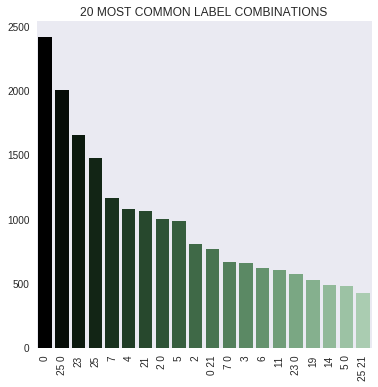

In [0]:
df = pd.read_csv(train_csv_path)

TRAINING_SAMPLES = df.shape[0]

print("we have " + str(TRAINING_SAMPLES) + " different samples")
print("And there are "+  str(len(df.Target.unique())) + " different combinations of labels in our dataset")

import seaborn as sns
sns.set(style="dark")

n = 20

values = df['Target'].value_counts()[:n].keys().tolist()
counts = df['Target'].value_counts()[:n].tolist()

plt.figure(figsize=(6,6))
pal = sns.cubehelix_palette(n, start=2, rot=0, dark=0, light=.75, reverse=True)
g = sns.barplot(y=counts, x=values, palette=pal)
g.set_title(str(n)+" MOST COMMON LABEL COMBINATIONS")
g.set_xticklabels(g.get_xticklabels(),rotation=90);

In [0]:
from PIL import Image

def load_image(basepath, image_id):
    images = np.zeros(shape=(256,256,4))
    r = Image.open(basepath+image_id+"_red.png").resize((256,256))
    g = Image.open(basepath+image_id+"_green.png").resize((256,256))
    b = Image.open(basepath+image_id+"_blue.png").resize((256,256))
    y = Image.open(basepath+image_id+"_yellow.png").resize((256,256))

    images[:,:,0] = np.asarray(r)
    images[:,:,1] = np.asarray(g)
    images[:,:,2] = np.asarray(b)
    images[:,:,3] = np.asarray(y)
    
    return images

In [0]:
targets = df['Target'].value_counts().keys()
counts = df['Target'].value_counts().values

how_many = counts/TRAINING_SAMPLES*DATASET_SIZE

# at least one example of each possible combination of labels..
how_many = how_many.astype('int')+1

In [0]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import warnings
warnings.filterwarnings("ignore")
from skimage import io, transform
from sklearn.preprocessing import MultiLabelBinarizer
classes = np.arange(0,28)
mlb = MultiLabelBinarizer(classes)
mlb.fit(classes)

class HumanProteinDataset(Dataset):

    def __init__(self, csv_file,transform=None, test=False):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            test (Boolean): the csv no contains labels
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.test = test
        self.complete_df = pd.read_csv(csv_file)
        
        if not test:
            self.path = train_path
            self.loadData()
        else:
            self.path = test_path
            self.df = self.complete_df
            
        self.transform = transform
        
    def CreateDummyVariables(self):
        self.complete_df['Targets'] = self.complete_df['Target'].map(lambda x: list(map(int, x.strip().split())))
            
    def loadData(self):
        self.CreateDummyVariables()
        self.df = pd.DataFrame(columns=['Id','Target'])
        for i, target in enumerate(targets):
            fdf = self.complete_df[self.complete_df['Target'] == target]
            sample = fdf.sample(n=how_many[i], replace=False)
            self.df = self.df.append(sample)
        self.df = self.df.sample(frac=1).reset_index(drop=True)
            
    def __getitem__(self, idx):
        
        image = load_image(self.path, self.df['Id'].iloc[idx])
        
        sample = {'image': image}

        if not self.test:
            target = np.array(self.complete_df['Targets'].iloc[idx])
            target = mlb.transform([target])
            sample['target'] = target
        
        else:
            sample['Id'] = self.df['Id'].iloc[idx]

        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.df.shape[0]
    
    def shape(self):
        return self.df.shape
    
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        
        image = sample['image']/255.0
        
        totensor = transforms.ToTensor()
        
        ret = {'image': totensor(image)}
        
        if "target" in sample.keys():
            target = sample['target'][0]
            ret['target'] = target
        else:
            ret['Id'] = sample['Id']
                  
        return ret

In [0]:
dataset = HumanProteinDataset(train_csv_path, transform=ToTensor())

In [0]:
protein = pd.read_csv(train_csv_path)
n=25
img_name = protein.iloc[n,0]
print('Image name: {}'.format(img_name))

labels = protein.iloc[n,1:]
labels = protein.iloc[n,1:]
#print('Label shape: {}'.format(labels.shape))
print('Labels: {}'.format(labels))

Image name: 004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0
Labels: Target    16 6
Name: 25, dtype: object


In [0]:
for i in range(len(dataset)):
  sample = dataset[i]
  print(i, sample['image'].shape, sample['target'].shape)
  
  if i == 3:
    break

0 torch.Size([4, 256, 256]) (28,)
1 torch.Size([4, 256, 256]) (28,)
2 torch.Size([4, 256, 256]) (28,)
3 torch.Size([4, 256, 256]) (28,)


In [0]:
def Show(sample):
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(3,3), sharey=True)

    title = ''
    
    labels =sample['target']
                
    for i, label in enumerate(LABELS):
        if labels[i] == 1:
            if title == '':
                title += label
            else:
                title += " & " + label
            
    ax1.imshow(sample['image'][0,:,:],cmap="hot")
    ax1.set_title('Red')
    ax2.imshow(sample['image'][1,:,:],cmap="copper")
    ax2.set_title('Green')
    ax3.imshow(sample['image'][2,:,:],cmap="bone")
    ax3.set_title('Blue')
    ax4.imshow(sample['image'][3,:,:],cmap="afmhot")
    ax4.set_title('Yellow')
    f.suptitle(title, fontsize=20, y=0.62)

In [0]:
dataset.df.shape[0]

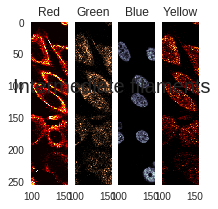

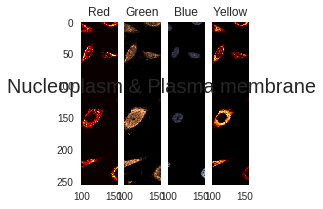

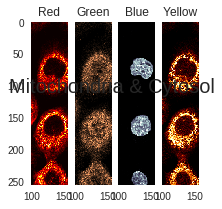

In [0]:
import random
import cv2
idxs = random.sample(range(1, dataset.df.shape[0]), 3)

for idx in idxs:
    Show(dataset[idx])

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim import lr_scheduler
import torch.optim as optim
import torch.nn as nn
import math

def prepare_loaders():
    dataset.loadData()
    num_train = len(dataset)
    indices = list(range(num_train))
    val_size = int(0.45 * num_train) 

    # Random, non-contiguous split
    validation_idx = np.random.choice(indices, size=val_size, replace=False)
    train_idx = list(set(indices) - set(validation_idx))

    train_sampler = SubsetRandomSampler(train_idx)
    validation_sampler = SubsetRandomSampler(validation_idx)

    dataset_sizes = {}

    dataset_sizes['train'] = len(train_idx)
    dataset_sizes['val'] = len(validation_idx)
    
    train_loader = DataLoader(dataset, batch_size=BATCH_SIZE,num_workers=0, sampler=train_sampler)
    validation_loader = DataLoader(dataset, batch_size=BATCH_SIZE, num_workers=0,sampler=validation_sampler)

    dataloaders = {}

    dataloaders['train'] = train_loader
    dataloaders['val'] = validation_loader
    
    return (dataloaders, dataset_sizes)

In [0]:
dataloaders, dataset_sizes = prepare_loaders()

dataset.df.head()

,Id,Target,Targets
0,fa26988a-bbbb-11e8-b2ba-ac1f6b6435d0,0,[0]
1,3e43651c-bbb1-11e8-b2ba-ac1f6b6435d0,23 4,"[23, 4]"
2,94fa2a8a-bbca-11e8-b2bc-ac1f6b6435d0,12 0 21,"[12, 0, 21]"
3,bfeed5b0-bbb6-11e8-b2ba-ac1f6b6435d0,3,[3]
4,b4c46282-bb9c-11e8-b2b9-ac1f6b6435d0,7,[7]


In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(      #input: 4xWxH
            nn.Conv2d(4,8,5,1,2),        # input_channels, output_channels, kernel_size, stride, padding   
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2), #output: 8xW/2xH/2
        )
        self.conv2 = nn.Sequential(      #input: 4xWxH
            nn.Conv2d(8,16,5,1,2),        # input_channels, output_channels, kernel_size, stride, padding   
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2), #output: 16xW/4xH/4
        )
        self.drop_out = nn.Dropout()
        self.out1 = nn.Linear( int(16 * W/4 * H/4), 900)   # fully connected layer, output 28 classes
        self.out2 = nn.Linear( 900, 28)   # fully connected layer, output 28 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.drop_out(x)
        output = self.out1(x)
        output = self.out2(output)
        return output, x    # return x for visualization

def init_weights(m):
        if type(m) == nn.Linear:
            torch.nn.init.xavier_uniform(m.weight)
            m.bias.data.fill_(0.01)

In [0]:
dataloaders, dataset_sizes = prepare_loaders()

In [0]:
losses = {}
accuracys = {}

losses['train'] = []
losses['val'] = []
accuracys['train'] = []
accuracys['val'] = []

In [0]:
def Train(model, epochs=10, criterion=nn.BCEWithLogitsLoss(reduction='sum'), optimizer= None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0


    if optimizer == None:
        optimizer = optim.Adam(model.parameters(), lr=0.04, betas=(0.9, 0.99))
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("training with device: " + str(device))
    
    model.to(device)
    
    for epoch in range(epochs):  # loop over the dataset multiple times
        print('Epoch {}/{}'.format(epoch+1, epochs))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
                
            running_loss = 0.0    
            running_corrects = 0.0
    
            for i, data in enumerate(dataloaders[phase], 0):            
                # get the inputs
                inputs, labels = data['image'], data['target']

                inputs, labels = inputs.to(device,dtype=torch.float), labels.to(device,dtype=torch.float)

                # zero the parameter gradients
                optimizer.zero_grad()
                
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)[0]
                    preds = outputs > 0
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                 # statistics
                running_loss += loss.item() * inputs.size(0)
                labels = labels.data.byte()
                running_corrects += torch.sum((labels == preds).all(1))
                                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.float() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            losses[phase].append(epoch_loss)
            accuracys[phase].append(epoch_acc)
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
                

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


def run_model(model,batch):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = batch
    inputs = inputs.to(device,dtype=torch.float)
    out = model(inputs)
    out = out[0].cpu()
    return out

In [0]:
# model creation and initialization
cnn = CNN()
cnn.apply(init_weights)

CNN(
  (conv1): Sequential(
    (0): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5)
  (out1): Linear(in_features=65536, out_features=900, bias=True)
  (out2): Linear(in_features=900, out_features=28, bias=True)
)

In [0]:
# training
torch.cuda.empty_cache()
cnn = Train(cnn, epochs=10,  criterion=nn.BCEWithLogitsLoss(reduction='sum'), optimizer = optim.Adam(cnn.parameters(), lr=0.001, betas=(0.9, 0.99)))

training with device: cuda:0
Epoch 1/10
----------
train Loss: 2212.9172 Acc: 0.0345
val Loss: 1052.4350 Acc: 0.0000
Epoch 2/10
----------
train Loss: 1027.7656 Acc: 0.0216
val Loss: 982.1511 Acc: 0.0000
Epoch 3/10
----------
train Loss: 978.5655 Acc: 0.0074
val Loss: 972.1999 Acc: 0.0000
Epoch 4/10
----------
train Loss: 969.9684 Acc: 0.0087
val Loss: 968.5368 Acc: 0.0000
Epoch 5/10
----------
train Loss: 962.7726 Acc: 0.0048
val Loss: 969.4554 Acc: 0.0021
Epoch 6/10
----------
train Loss: 955.2962 Acc: 0.0033
val Loss: 970.5973 Acc: 0.0008
Epoch 7/10
----------
train Loss: 947.1839 Acc: 0.0026
val Loss: 972.6491 Acc: 0.0182
Epoch 8/10
----------
train Loss: 934.9719 Acc: 0.0153
val Loss: 978.9040 Acc: 0.0379
Epoch 9/10
----------
train Loss: 918.7907 Acc: 0.0208
val Loss: 985.4251 Acc: 0.0227
Epoch 10/10
----------
train Loss: 895.3828 Acc: 0.0269
val Loss: 998.4381 Acc: 0.0203
Training complete in 26m 8s
Best val Acc: 0.037917


In [0]:
# training
torch.cuda.empty_cache()
cnn = Train(cnn, epochs=10,  criterion=nn.BCEWithLogitsLoss(reduction='sum'), optimizer = optim.Adam(cnn.parameters(), lr=0.001, betas=(0.9, 0.99)))
dataloaders, dataset_sizes = prepare_loaders()
torch.cuda.empty_cache()
cnn = Train(cnn, epochs=10,  criterion=nn.BCEWithLogitsLoss(reduction='sum'), optimizer = optim.Adam(cnn.parameters(), lr=0.001, betas=(0.9, 0.99)))

training with device: cuda:0
Epoch 1/10
----------
train Loss: 985.5222 Acc: 0.0264
val Loss: 987.9067 Acc: 0.0123
Epoch 2/10
----------
train Loss: 903.1345 Acc: 0.0315
val Loss: 997.9081 Acc: 0.0077
Epoch 3/10
----------
train Loss: 783.0804 Acc: 0.0880
val Loss: 1120.5109 Acc: 0.0246
Epoch 4/10
----------
train Loss: 516.8501 Acc: 0.3218
val Loss: 1370.1402 Acc: 0.0179
Epoch 5/10
----------
train Loss: 254.9823 Acc: 0.6413
val Loss: 1755.8955 Acc: 0.0489
Epoch 6/10
----------
train Loss: 122.8337 Acc: 0.8357
val Loss: 2317.2930 Acc: 0.0360
Epoch 7/10
----------
train Loss: 58.7535 Acc: 0.9426
val Loss: 2783.6992 Acc: 0.0382
Epoch 8/10
----------
train Loss: 34.0767 Acc: 0.9760
val Loss: 3107.7922 Acc: 0.0339
Epoch 9/10
----------
train Loss: 22.1694 Acc: 0.9869
val Loss: 3359.3625 Acc: 0.0334
Epoch 10/10
----------
train Loss: 19.1492 Acc: 0.9902
val Loss: 3619.1952 Acc: 0.0299
Training complete in 24m 0s
Best val Acc: 0.048865
training with device: cuda:0
Epoch 1/10
----------
trai

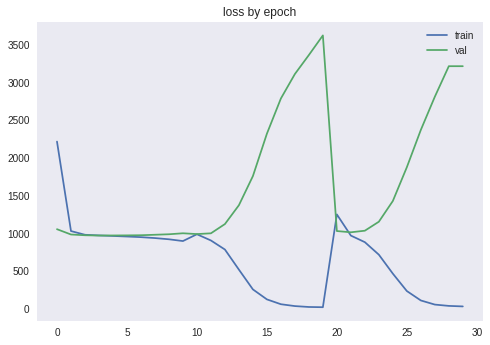

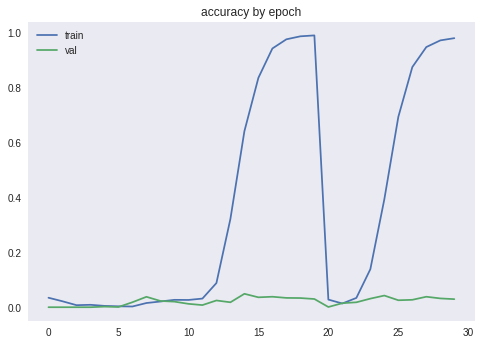

In [0]:
plt.plot(np.arange(len(losses['train'])), losses['train'],label="train")
plt.plot(np.arange(len(losses['val'])), losses['val'], label="val")
plt.legend()
plt.title("loss by epoch")
plt.show()

plt.plot(np.arange(len(accuracys['train'])), accuracys['train'], label="train")
plt.plot(np.arange(len(accuracys['val'])), accuracys['val'], label="val")
plt.title("accuracy by epoch")
plt.legend()
plt.show()

In [0]:
import torchvision.models as models
resnet34 = models.resnet34()

In [0]:
import torch
import torch.nn as nn
import torchvision
import cv2

RESNET_ENCODERS = {
    34: torchvision.models.resnet34,
    50: torchvision.models.resnet50,
    101: torchvision.models.resnet101,
    152: torchvision.models.resnet152,
}
class Resnet4Channel(nn.Module):
    def __init__(self, encoder_depth=34, pretrained=True, num_classes=28):
        super().__init__()

        encoder = RESNET_ENCODERS[encoder_depth](pretrained=pretrained)
        
        # we initialize this conv to take in 4 channels instead of 3
        # we keeping corresponding weights and initializing new weights with zeros
        # this trick taken from https://www.kaggle.com/iafoss/pretrained-resnet34-with-rgby-0-460-public-lb
        w = encoder.conv1.weight
        self.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        
        self.conv1.weight = nn.Parameter(torch.cat((w,w[:,:1,:,:]),dim=1))
        
        self.bn1 = encoder.bn1
        self.relu = nn.ReLU(inplace=True) 
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = encoder.layer1
        self.layer2 = encoder.layer2
        self.layer3 = encoder.layer3
        self.layer4 = encoder.layer4
        
        self.avgpool = encoder.avgpool
        self.fc = nn.Linear(512 * (1 if encoder_depth==34 else 4), num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x
    

def resnet34(pretrained):
    return Resnet4Channel(encoder_depth=34)

def resnet50(pretrained):
    return Resnet4Channel(encoder_depth=50)

In [0]:
class Resnet34_4(nn.Module):
    def __init__(self, pre=True):
        super().__init__()
        encoder = resnet34(pretrained=pre)
        
        self.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
        if(pre):
            w = encoder.conv1.weight
            self.conv1.weight = nn.Parameter(torch.cat((w,
                                    0.5*(w[:,:1,:,:]+w[:,2:,:,:])),dim=1))
        
        self.bn1 = encoder.bn1
        self.relu = nn.ReLU(inplace=True) 
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer0 = nn.Sequential(self.conv1,self.relu,self.bn1,self.maxpool)
        self.layer1 = encoder.layer1
        self.layer2 = encoder.layer2
        self.layer3 = encoder.layer3
        self.layer4 = encoder.layer4
        #the head will be added automatically by fast.ai
        
    def forward(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        return x

In [0]:
dataloaders, dataset_sizes = prepare_loaders()

In [0]:
losses = {}
accuracys = {}

losses['train'] = []
losses['val'] = []
accuracys['train'] = []
accuracys['val'] = []

In [0]:
def Train(model, epochs=10, criterion=nn.BCEWithLogitsLoss(reduction='sum'), optimizer= None):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0


    if optimizer == None:
        optimizer = optim.Adam(model.parameters(), lr=0.04, betas=(0.9, 0.99))
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("training with device: " + str(device))
    
    model.to(device)
    
    for epoch in range(epochs):  # loop over the dataset multiple times
        print('Epoch {}/{}'.format(epoch+1, epochs))
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
                
            running_loss = 0.0    
            running_corrects = 0.0
    
            for i, data in enumerate(dataloaders[phase], 0):            
                # get the inputs
                inputs, labels = data['image'], data['target']

                inputs, labels = inputs.to(device,dtype=torch.float), labels.to(device,dtype=torch.float)

                # zero the parameter gradients
                optimizer.zero_grad()
                
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)[0]
                    preds = outputs > 0
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                 # statistics
                running_loss += loss.item() * inputs.size(0)
                labels = labels.data.byte()
                running_corrects += torch.sum((labels == preds).all(1))
                                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.float() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            losses[phase].append(epoch_loss)
            accuracys[phase].append(epoch_acc)
            
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                
                

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


def run_model(model,batch):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = batch
    inputs = inputs.to(device,dtype=torch.float)
    out = model(inputs)
    out = out[0].cpu()
    return out

In [0]:
cnn = Resnet34_4()
#cnn = CNN()
cnn.apply(init_weights)

In [0]:
torch.cuda.empty_cache()
cnn = Train(cnn, epochs=10,  criterion=nn.BCEWithLogitsLoss(reduction='sum'), optimizer = optim.Adam(cnn.parameters(), lr=0.001, betas=(0.9, 0.99)))

### Training a classifier

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### Testing torch

In [0]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [0]:
landmarks_frame = pd.read_csv('data/faces/face_landmarks.csv')

n = 65
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

In [0]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

In [0]:
data_dir = "data/protein"
model_name = "resnet"

In [0]:
num_classes = 27

In [0]:
batch_size = 64

In [0]:
num_epochs = 7

In [0]:
feature_extract = True

In [0]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [0]:
(fc): Linear(in_features=512, out_features=1000, bias=True)

In [0]:
model.fc = nn.Linear(512, num_classes)

In [0]:
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

In [0]:
protein_stats = ([0.08069, 0.05258, 0.05487, 0.08282], [0.13704, 0.10145, 0.15313, 0.13814])